# The Battle of Neighborhood: Vacation accommodation in London
## 1. Introduction
### 1.1 Background Information
London is one of the top tourist destination in the world, when travellers stay in London, Airbnb is always a choice over hotel considering the price and the variety of neighborhood location for accommodation.

### 1.2 Problem Statement
According to Inside Airbnb, there are over 70000 accommodation listings in London in the year 2021. Therefore, it will be hard to find the right accommodation to rent via Airbnb service.

In this project, I will try to investigate the optimal location in London where travellers can enjoy a pleasant stay, with a variety of restaurants nearby as well as convenient journey to travel numerous attractions in London.

### 1.3 Target Audience
This report is an analysis of Airbnb accommodation listings in London for travellers who would like to visit London and provide some recommendation on the location of stay.

## 2. Data

To solve the problem, I will use the data extracted from Airbnb to get the list of accommodation in London and then get the services of Foursquare API to explore the attractions nearby the accommodation in London

For the list of accommodation, I will calculate the accommodation price (per person per night) based on neighbourhood in London, and perform sorting to get a list of highest review rating accommodation with lowest accommodation price.   

While for the attractions, it will include the information about the places around each neighborhood like restaurants, hotels, coffee shops, parks, theaters, art galleries, museums and etc. 

I will use machine learning technique, “Clustering” to segment the neighborhoods with similar objects on the basis of each neighborhood data, and based on the result to provide recommendation based on the attractions, price and rating.


### 2.1 Data Required
1. Average accommodation price based on neighbourhood
2. Number of venues including tourists attractions, restaurants and shopping malls in the neighborhood

### 2.2 Data Sources
In this project, I will use free public available dataset. Below is the link to the dataset.

1. Airbnb accommodation data from Inside Airbnb: http://insideairbnb.com/get-the-data.html 
2. Foursquare API to extract data on venues in a neighbourhood: https://developer.foursquare.com/
            
### 2.3 Data details
#### 2.3.1 Airbnb data: 
##### This is the direct link to download the data file: http://data.insideairbnb.com/united-kingdom/england/london/2021-04-11/data/listings.csv.gz

To streamline the analysis, only the below columns will be selected for analysis
##### Description for each column:
1. id: unique id for each accommodation
2. neighbourhood_cleansed: neighbourhood name that the accommodation is located
3. latitude: latitude of accommodation location
4. longitude: longitude of accommodation location
5. room_type: accommodation room type
6. price: price of accommodation per night
7. minimum_nights: minimum nights of stay
8. accommodates: number of person
9. availability_365: accommodation's availability days per year
10. number_of_reviews: number of reviews in total

##### Filter the data with fthe followings conditions:
1. Minimum nights (at least 1 and not more than 5) 
2. Number of reviews (at least 50)
3. Exclude shared room
4. Availability (at least more than 10 days per year)

#### 2.3.2 Foursquare api to be used
I will make use of Insider Airbnb data for analysis and later to check against Foursquare api to explore the nearby attractions

https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium

print('Libraires imported')

Libraires imported


In [2]:
df = pd.read_csv('listings.csv', low_memory = False)

In [3]:
df.head()

id                         listing_url       scrape_id last_scraped  \
0  11551  https://www.airbnb.com/rooms/11551  20210411033700   2021-04-19   
1  13913  https://www.airbnb.com/rooms/13913  20210411033700   2021-04-17   
2  15400  https://www.airbnb.com/rooms/15400  20210411033700   2021-04-16   
3  17402  https://www.airbnb.com/rooms/17402  20210411033700   2021-04-14   
4  17506  https://www.airbnb.com/rooms/17506  20210411033700   2021-04-15   

                                                name  \
0         Arty and Bright London Apartment in Zone 2   
1                Holiday London DB Room Let-on going   
2                Bright Chelsea  Apartment. Chelsea!   
3              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
4  Boutique Chelsea/Fulham Double bed 5-star ensuite   

                                         description  \
0  Unlike most rental apartments my flat gives yo...   
1  My bright double bedroom with a large window h...   
2  Lots of windows and light.  St Luke's Gardens ...   
3  You'll have a wonderful stay in this superb mo...   
4  Enjoy a chic stay in this elegant but fully mo...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   
3  Location, location, location! You won't find b...   
4  Fulham is 'villagey' and residential – a real ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   
3  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
4  https://a0.muscache.com/pictures/11901327/e63d...    67915   

                                  host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/43039  ...                        10.0   
1  https://www.airbnb.com/users/show/54730  ...                        10.0   
2  https://www.airbnb.com/users/show/60302  ...                        10.0   
3  https://www.airbnb.com/users/show/67564  ...                         9.0   
4  https://www.airbnb.com/users/show/67915  ...                         NaN   

  review_scores_location review_scores_value license instant_bookable  \
0                    9.0                 9.0     NaN                t   
1                    9.0                 9.0     NaN                f   
2                   10.0                 9.0     NaN                t   
3                   10.0                 9.0     NaN                f   
4                    NaN                 NaN     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              2                                           1   
2                              1                                           1   
3                             15                                          15   
4                              2                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.43  
1                                           0              0.16  
2                                           0              0.65  
3                                           0              0.34  
4                                           0               NaN  

[5 rows x 74 columns]

In [4]:
df.shape

(74840, 74)

#### To streamline the analysis, only the selected columns will be selected for analysis
Description for each column as above 

#### Filter the data with fthe followings conditions:
1. Minimum nights (at least 1 and not more than 5)
2. Number of reviews (at least 50)
3. Exclude shared room
4. Availability (at least more than 10 days per year)

In [5]:
# Remove columns
df1 = df[["id", "neighbourhood_cleansed", "latitude", "longitude", "room_type", "price", "minimum_nights", "accommodates",
          "availability_365", "review_scores_rating", "number_of_reviews"]]

In [6]:
# Filter data
df1 = df1[(df1.minimum_nights >= 1)
           & (df1.minimum_nights < 5 )
           & (df1.number_of_reviews >= 50)
           & (~df1.room_type.isin(['Shared room']) )
           & (df1.availability_365 >= 10)
          ]

df1 = df1.reset_index(drop = True)

df1.shape

(3713, 11)

In [7]:
df1.head()

id  neighbourhood_cleansed  latitude  longitude        room_type  \
0  11551                 Lambeth  51.46095   -0.11758  Entire home/apt   
1  36299    Richmond upon Thames  51.48085   -0.28086  Entire home/apt   
2  36660                Haringey  51.58478   -0.16057     Private room   
3  37384               Southwark  51.46894   -0.06623     Private room   
4  38605  Hammersmith and Fulham  51.50681   -0.23345     Private room   

     price  minimum_nights  accommodates  availability_365  \
0  $110.00               2             4               220   
1  $195.00               3             5               271   
2   $72.00               2             2               357   
3   $70.00               2             2               364   
4   $58.00               2             2               180   

   review_scores_rating  number_of_reviews  
0                  91.0                193  
1                  96.0                 79  
2                  97.0                528  
3                  96.0                 55  
4                  95.0                366

Perform data cleansing, check for null value

In [8]:
df1.isnull().sum()

id                        0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
accommodates              0
availability_365          0
review_scores_rating      0
number_of_reviews         0
dtype: int64

Replace the null score 50 (mean)

In [9]:
df1['review_scores_rating'] = df1['review_scores_rating'].fillna('50')

Replace the accommodates from 0 to 1, as I will use it as the denominator for price per person later on, and we cannot divide price by zero 

In [10]:
df1["accommodates"].replace(0, 1, inplace=True)

In [11]:
df1.isnull().sum()

id                        0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
accommodates              0
availability_365          0
review_scores_rating      0
number_of_reviews         0
dtype: int64

In [12]:
df1.dtypes

id                          int64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
price                      object
minimum_nights              int64
accommodates                int64
availability_365            int64
review_scores_rating      float64
number_of_reviews           int64
dtype: object

remove the "$" and "," symbol from "price" column and change the data type from object to float64 for calculation prupose later.

In [13]:
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype('float')

In [14]:
df1.dtypes

id                          int64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
room_type                  object
price                     float64
minimum_nights              int64
accommodates                int64
availability_365            int64
review_scores_rating      float64
number_of_reviews           int64
dtype: object

We will now check for outliers in the "price" columns

Text(0.5, 0.98, '')

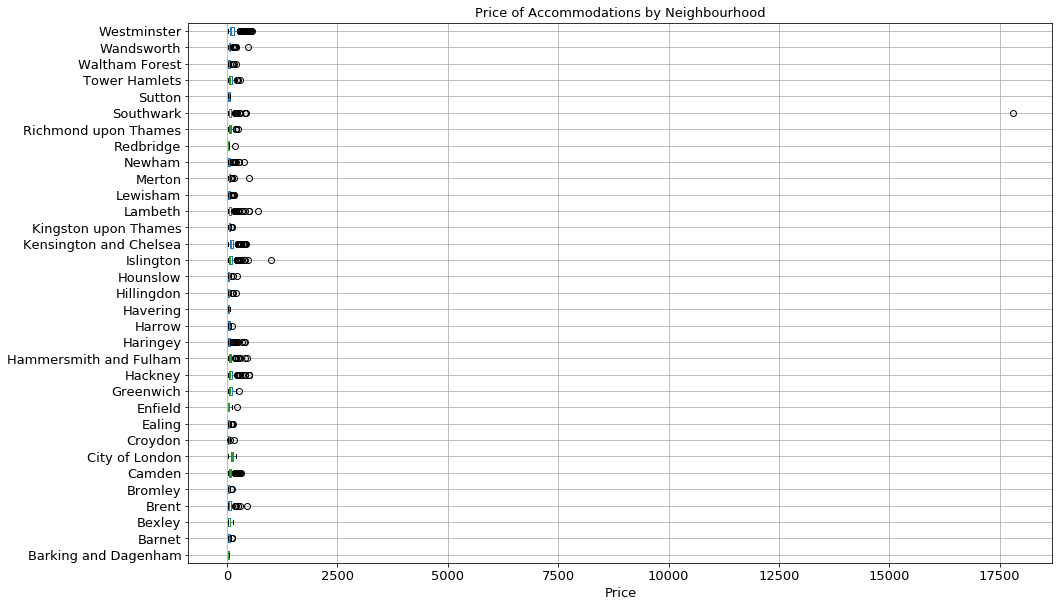

In [15]:
# Plot a box plot
box = df1[['neighbourhood_cleansed','price']].boxplot(
    column='price', 
    by='neighbourhood_cleansed',
    vert=False, 
    fontsize=13, 
    figsize=(15,10)
)

box.get_figure().gca().set_title("Price of Accommodations by Neighbourhood", fontsize=13)
box.get_figure().gca().set_xlabel('Price', fontsize=13)
box.get_figure().suptitle('')

From the box plot above, there are some points that distance away from other observations. Hence, I will remove any point that is not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR)

In [16]:
# Calculate Q1, Q3 and IQR
Q1 = df1.price.quantile(0.25)
Q3 = df1.price.quantile(0.75)
IQR = Q3 - Q1

# Remove data that is not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR)
condition = (df1.price >= Q1 - 1.5 * IQR) & (df1.price <= Q3 + 1.5 *IQR)
df1 = df1.loc[condition]  

df1.shape

(3457, 11)

Plot another box plot with our new dataframe after outliers removed

Text(0.5, 0.98, '')

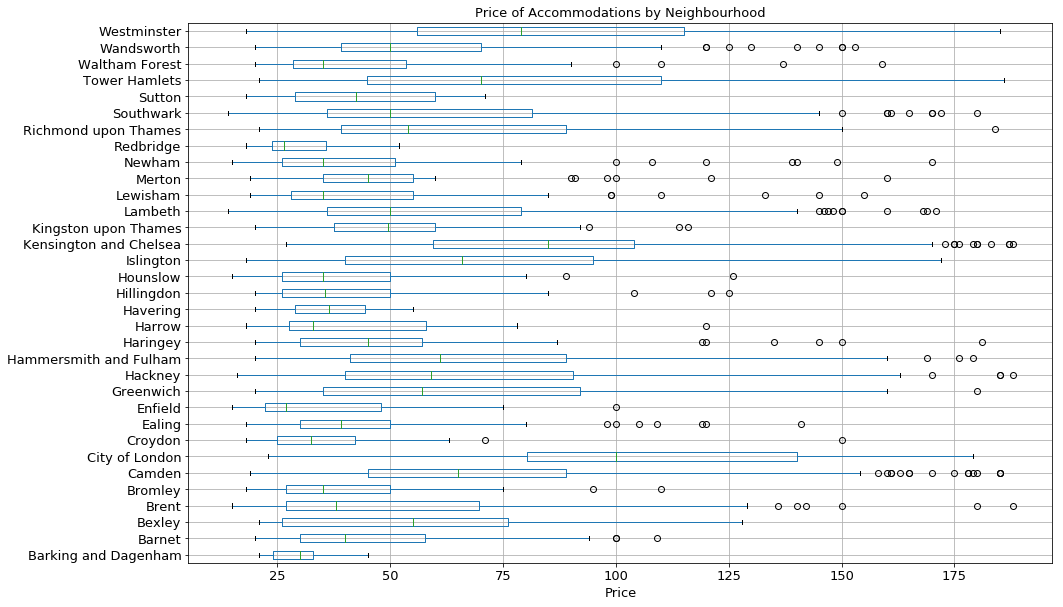

In [17]:
# Plot a box plot
box = df1[['neighbourhood_cleansed','price']].boxplot(
    column='price', 
    by='neighbourhood_cleansed',
    vert=False, 
    fontsize=13, 
    figsize=(15,10)
)

box.get_figure().gca().set_title("Price of Accommodations by Neighbourhood", fontsize=13)
box.get_figure().gca().set_xlabel('Price', fontsize=13)
box.get_figure().suptitle('')

## 3. Methodology
In this section, I will first perform an exploratory data analysis to understand our dataset before we start solving our problem.

1. In our exploratory data analysis, I will investigate the average price per person to stay in a neighbourhood and plot a map to visualise the distribution of accommodations across London.

2. Then, I will rank the top 100 accommodations base on ratings and price.

3. After that, I will use Foursquare API to obtain atractions nearby to our top 100 accommodations.

4. In our final step, I will cluster our accommodations with k-means clustering and provide recommendations to travellers.

### 3.1 Exploratory Data Analysis
Lets calculate the average price per person for each accommodation.

In [18]:
df1['avg_price'] = df1.price / df1.accommodates

In [19]:
df1.head()

id  neighbourhood_cleansed  latitude  longitude        room_type  price  \
0  11551                 Lambeth  51.46095   -0.11758  Entire home/apt  110.0   
2  36660                Haringey  51.58478   -0.16057     Private room   72.0   
3  37384               Southwark  51.46894   -0.06623     Private room   70.0   
4  38605  Hammersmith and Fulham  51.50681   -0.23345     Private room   58.0   
5  41509                Hounslow  51.49351   -0.25568     Private room   42.0   

   minimum_nights  accommodates  availability_365  review_scores_rating  \
0               2             4               220                  91.0   
2               2             2               357                  97.0   
3               2             2               364                  96.0   
4               2             2               180                  95.0   
5               1             4               180                  90.0   

   number_of_reviews  avg_price  
0                193       27.5  
2                528       36.0  
3                 55       35.0  
4                366       29.0  
5                 71       10.5

Then, I will calculate the mean for average price per person in each neighbourhood.

In [20]:
# dataframe with mean of average price per person in each neighbourhood
df2 = df1.groupby("neighbourhood_cleansed", as_index = False).agg({"avg_price":"mean"})
df2 = df2.sort_values("avg_price").reset_index(drop = True)

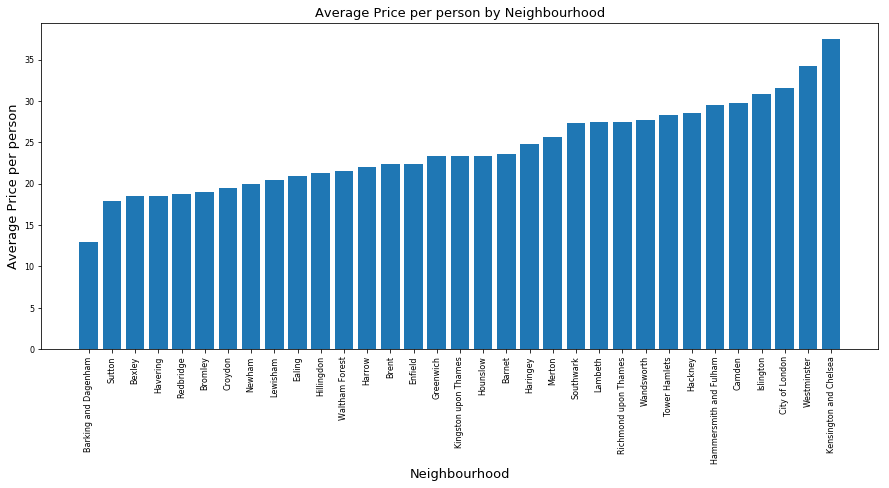

In [21]:
# plot a bar graph on Average Price per person by Neighbourhood
fig, ax = plt.subplots(figsize=(15,6))
x = df2.neighbourhood_cleansed
y = df2.avg_price
ax.bar(x, y)
ax.set_xlabel('Neighbourhood', fontsize = 13)
ax.set_ylabel('Average Price per person', fontsize = 13)
ax.set_title('Average Price per person by Neighbourhood', fontsize = 13)
plt.xticks(x, rotation=90)
plt.tick_params(labelsize=8)
plt.show()

Plot a map to visualise the distribution of accommodations across London.

In [22]:
london_map = folium.Map(location=[51.5074, 0.1278],zoom_start=10)

for lat, lon, neigh in zip(df1['latitude'],df1['longitude'],df1['neighbourhood_cleansed']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lon],
    radius=4,
    popup=label,
    color='blue',
    fill=True,
    fill_color='white',
    fill_opacity=0.5,
    parse_html=False).add_to(london_map)

london_map

### 3.2 Rank Top 100 Accommodations
Now, we will rank top 100 accommodations base on highest ratings with lowest price per person.

In [23]:
limit=100
df_top = df1.sort_values(by=['review_scores_rating','avg_price'], 
                                         ascending=[False, True])[['id', 'neighbourhood_cleansed','latitude', 'longitude' ,
                                                                         'review_scores_rating', 'room_type','price', 
                                                                         'avg_price']].head(limit)

df_top = df_top.reset_index(drop=True)

In [24]:
df_top

id  neighbourhood_cleansed  latitude  longitude  \
0   19195802                  Harrow  51.58616   -0.38228   
1   17918553              Hillingdon  51.53870   -0.47244   
2   19005138                Lewisham  51.45836   -0.03600   
3    1220217           Tower Hamlets  51.51334   -0.05743   
4   15974991                 Lambeth  51.47255   -0.11281   
5   20596017                  Sutton  51.36450   -0.20201   
6   25912554    Kingston upon Thames  51.39241   -0.26574   
7   10274171    Barking and Dagenham  51.54282    0.07743   
8   30415048    Kingston upon Thames  51.37874   -0.26221   
9    9582415    Richmond upon Thames  51.44521   -0.38031   
10  18651955                   Brent  51.59341   -0.28037   
11  22062146               Islington  51.57364   -0.12677   
12  27950724                  Barnet  51.61131   -0.18952   
13  32042004    Richmond upon Thames  51.43089   -0.36547   
14   2373926                  Merton  51.39348   -0.21907   
15   5000458              Wandsworth  51.43922   -0.20308   
16  23227392    Richmond upon Thames  51.43418   -0.34868   
17  12238189               Greenwich  51.48441    0.00350   
18  18371504               Southwark  51.47996   -0.08071   
19  24488053  Hammersmith and Fulham  51.50502   -0.22984   
20  25155551              Wandsworth  51.45956   -0.18909   
21  25261754              Wandsworth  51.45302   -0.19897   
22  29625501                  Camden  51.54935   -0.15606   
23   7049604              Wandsworth  51.47445   -0.15862   
24  14363675                  Ealing  51.54411   -0.31635   
25  20068331                  Ealing  51.50477   -0.34267   
26   8510157                  Ealing  51.50623   -0.31149   
27   5209535                  Harrow  51.57805   -0.35020   
28  15510717                  Ealing  51.52350   -0.36045   
29  17657876                 Lambeth  51.41997   -0.08083   
..       ...                     ...       ...        ...   
70  15950902  Kensington and Chelsea  51.51094   -0.19311   
71  17537650               Greenwich  51.47757    0.02039   
72  23428178          Waltham Forest  51.58210   -0.01276   
73  21587575                  Camden  51.54289   -0.13313   
74  22428604                  Barnet  51.61916   -0.26987   
75  23018965              Hillingdon  51.55199   -0.48086   
76  24914948                Lewisham  51.43400   -0.06561   
77  16345866  Kensington and Chelsea  51.49670   -0.18887   
78  20538711                  Camden  51.51859   -0.12560   
79  29098736              Wandsworth  51.47294   -0.16479   
80   4345745                 Hackney  51.54218   -0.07986   
81   5431679                 Lambeth  51.46412   -0.13263   
82  25421963  Kensington and Chelsea  51.49583   -0.19677   
83  13692946              Wandsworth  51.47943   -0.17009   
84  15013829                  Merton  51.43058   -0.20419   
85  17634282                   Brent  51.53568   -0.20565   
86  16155322  Hammersmith and Fulham  51.47032   -0.21189   
87  16155609  Hammersmith and Fulham  51.47016   -0.21176   
88    632717                   Brent  51.56125   -0.28665   
89   5514890               Southwark  51.49596   -0.07539   
90  14270575               Southwark  51.50127   -0.08939   
91  16575179  Hammersmith and Fulham  51.47992   -0.21353   
92  21564181  Hammersmith and Fulham  51.48868   -0.22657   
93  18067096               Southwark  51.48157   -0.09344   
94    758052                Haringey  51.58336   -0.12564   
95  10834921                  Ealing  51.51640   -0.30051   
96  16156667                 Hackney  51.53551   -0.07773   
97  19483907                  Camden  51.55087   -0.18114   
98  23820023              Wandsworth  51.46073   -0.18589   
99  15490112                  Camden  51.54204   -0.13806   

    review_scores_rating        room_type  price  avg_price  
0                  100.0     Private room   33.0      11.00  
1                  100.0     Private room   31.0      15.50  
2                  100.0     Private room

### 3.3 Get Venues Nearby with Foursquare API
Link to Foursquare API: https://foursquare.com/developers/apps

To use Foursquare API, we need to definde Foresquare Credentials and Version.

In [25]:
CLIENT_ID = 'BKJ2OH40HLFZLWQF4FE4RD1WDSN5Z2OYF2AWY4LTCW44ANLK' # your Foursquare ID
CLIENT_SECRET = 'OAJV1QTZYCIDFBXCMXYZ3KGUDZMGZIPHO4ZFG1W3AN11RDSQ' # your Foursquare Secret
ACCESS_TOKEN = 'UUAQSCEZXOH5GRJCBQI3DSN4GV0DNTFLXFAVT3QFCUNMJCFF' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BKJ2OH40HLFZLWQF4FE4RD1WDSN5Z2OYF2AWY4LTCW44ANLK
CLIENT_SECRET:OAJV1QTZYCIDFBXCMXYZ3KGUDZMGZIPHO4ZFG1W3AN11RDSQ


The following is a function that takes neighbourhood, latitude and longitude as input and gives back the venues around the location provided (500m of radius):

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius, limit):
   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['id', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
df_venue = getNearbyVenues(names=df_top['id'],
                       latitudes=df_top['latitude'],
                       longitudes=df_top['longitude'],
                       radius = 500,
                       limit = LIMIT
                      )

In [69]:
df_venue.head() 

id  Neighborhood Latitude  Neighborhood Longitude  \
0  19195802               51.58616                -0.38228   
1  19195802               51.58616                -0.38228   
2  17918553               51.53870                -0.47244   
3  17918553               51.53870                -0.47244   
4  17918553               51.53870                -0.47244   

                              Venue  Venue Latitude  Venue Longitude  \
0                       Pinner Arms       51.586031        -0.381477   
1            Pinner Village Gardens       51.587804        -0.377638   
2               Jack's Fish & Chips       51.537390        -0.471608   
3                  Lancaster Suites       51.534427        -0.471506   
4  Bus Stops BD & BE - The Greenway       51.536877        -0.470565   

      Venue Category  
0                Pub  
1               Park  
2  Fish & Chips Shop  
3              Hotel  
4           Bus Stop

In [29]:
df_venue.shape

(1868, 7)

#### Define custom attractions category for easier clustering

In [47]:
food = ['Restaurant', 'Food', 'Café', 'Coffee', 'Desert', 'Bakery', 'Snack', 'Burger', 
        'Steakhouse', 'Buffet', 'Sandwich', 'Ice Cream', 'Noodle', 'Sandwich', 'Kebab', 'Pizza', 'Fish & Chips']

entertainment = ['Aquarium', 'Theme Park', 'Scenic Lookout','Pub', 'Wine', 'Bar', 'Spa', 'Gastropub', 'Liquor', 'Club']

shopping = ['Shopping', 'Boutique', 'Clothing', 'Cosmetics', 'Jewelry']

outdoor = ['Court', 'Trail', 'Bay', 'Field', 'Park', 'Beach', 'Waterfront', 'Stadium', 'Garden', 'Plaza', 'Campground', 'Flea' 
]
    
transport = ['Tram', 'Station', 'Bus']

art = ['Museum', 'Historic', 'Temple', 'Art', 'Sculpture']

In [48]:
customized_category = food + entertainment + shopping + outdoor + transport + art

In [49]:
# Get venues from custom categories
def getvenues(category):
    if any(word in category for word in customized_category):
        return True
    return False

In [50]:
# Define venues by our custom categories
def custom_category(x):
    if any(word in x for word in food):
        return 'Food'
    if any(word in x for word in entertainment):
        return 'Entertainment'
    if any(word in x for word in shopping):
        return 'Shopping'
    if any(word in x for word in outdoor):        
        return 'Outdoor'
    if any(word in x for word in transport):            
        return 'Transport'
    if any(word in x for word in fineart):            
        return 'Art'

In [51]:
# Get top venues
def common_venues(row, n):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)      
    return row_categories_sorted.index.values[0:n] 

def common_venues_count(row, n):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False).astype(float)      
    return row_categories_sorted.values[0:n]

In [52]:
# Here, we exclude data that is not included in our custom categories
df_venue2 = df_venue[df_venue['Venue Category'].apply(lambda x: getvenues(x))].reset_index(drop=True)

In [53]:
# Here, we add a new custom category column to our dataframe 
df_venue2['custom_category']= df_venue2['Venue Category'].apply(lambda x: custom_category(x))

In [68]:
df_venue2.head() 

id  Neighborhood Latitude  Neighborhood Longitude  \
0  19195802               51.58616                -0.38228   
1  19195802               51.58616                -0.38228   
2  17918553               51.53870                -0.47244   
3  17918553               51.53870                -0.47244   
4  17918553               51.53870                -0.47244   

                                       Venue  Venue Latitude  Venue Longitude  \
0                                Pinner Arms       51.586031        -0.381477   
1                     Pinner Village Gardens       51.587804        -0.377638   
2                        Jack's Fish & Chips       51.537390        -0.471608   
3           Bus Stops BD & BE - The Greenway       51.536877        -0.470565   
4  Brunel University Cleveland Road Bus Stop       51.534976        -0.476191   

      Venue Category custom_category  
0                Pub   Entertainment  
1               Park         Outdoor  
2  Fish & Chips Shop            Food  
3           Bus Stop       Transport  
4           Bus Stop       Transport

### 3.4 One Hot Encoding and K-means Clustering
Determine the top 3 venues for each accommodation. This can be done with one hot encoding.

In [57]:
# one hot encoding
df_onehot = pd.get_dummies(df_venue2[['custom_category']], prefix="", prefix_sep="")

In [58]:
# This is to place the id column back to our dataframe
df_onehot['id'] = df_venue['id']

In [59]:
df_group = (np.round(df_onehot.groupby('id').mean(),2)).reset_index()

In [67]:
df_group.head() 

id  Art  Entertainment  Food  Outdoor  Shopping  Transport
0   436446  0.0           0.15  0.69     0.08      0.00       0.08
1   616278  0.0           0.17  0.50     0.20      0.00       0.13
2   957726  0.0           0.17  0.83     0.00      0.00       0.00
3  1220217  0.0           0.12  0.40     0.28      0.04       0.12
4  1457328  0.0           0.28  0.62     0.10      0.00       0.00

#### Get the top 3 venues of each accommodation

In [61]:
# top 3 venue
n = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['id']
for ind in np.arange(n):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
for ind in np.arange(n):
    try:
        columns.append('{}{} Most Common Venue Share'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Share'.format(ind+1))        
        

# create a new dataframe
df_group2 = pd.DataFrame(columns=columns)
df_group2['id'] = df_group['id']

for ind in np.arange(df_group.shape[0]):
    stats = np.around(common_venues_count(df_group.iloc[ind, :], n),2) 
    category = common_venues(df_group.iloc[ind, :], n)
    df_group2.iloc[ind, 1:] = np.concatenate([category, stats])

#### use k-means clustering to cluster our accommodations into 2 clusters

In [63]:
# set number of clusters
k = 2

df_cluster = df_group.drop('id', axis = 1)

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster)

# add cluster label
df_group2.insert(0, 'Cluster Labels', kmeans.labels_)

In [65]:
df_group2.head() 

Cluster Labels       id 1st Most Common Venue 2nd Most Common Venue  \
0               0   436446                  Food         Entertainment   
1               1   616278                  Food               Outdoor   
2               0   957726                  Food         Entertainment   
3               1  1220217                  Food               Outdoor   
4               0  1457328                  Food         Entertainment   

  3rd Most Common Venue 1st Most Common Venue Share  \
0             Transport                        0.69   
1         Entertainment                         0.5   
2             Transport                        0.83   
3             Transport                         0.4   
4               Outdoor                        0.62   

  2nd Most Common Venue Share 3rd Most Common Venue Share  
0                        0.15                        0.08  
1                         0.2                        0.17  
2                        0.17                           0  
3                        0.28                        0.12  
4                        0.28                         0.1

#### Include latitude, longitude, neighbourhood_cleansed, review_scores_rating, room_type, price and avg_price to dataframe.

In [70]:
df_merged = df_top.copy()
df_merged = df_merged.join(df_group2.set_index('id'), on='id')
df_merged = df_merged.dropna()
df_merged['Cluster Labels'] = df_merged['Cluster Labels'].astype('int')

In [71]:
df_merged.head()

id neighbourhood_cleansed  latitude  longitude  review_scores_rating  \
0  19195802                 Harrow  51.58616   -0.38228                 100.0   
1  17918553             Hillingdon  51.53870   -0.47244                 100.0   
2  19005138               Lewisham  51.45836   -0.03600                 100.0   
3   1220217          Tower Hamlets  51.51334   -0.05743                 100.0   
4  15974991                Lambeth  51.47255   -0.11281                 100.0   

      room_type  price  avg_price  Cluster Labels 1st Most Common Venue  \
0  Private room   33.0       11.0               1               Outdoor   
1  Private room   31.0       15.5               0             Transport   
2  Private room   31.0       15.5               0                  Food   
3  Private room   32.0       16.0               1                  Food   
4  Private room   32.0       16.0               0                  Food   

  2nd Most Common Venue 3rd Most Common Venue 1st Most Common Venue Share  \
0         Entertainment             Transport                         0.5   
1                  Food              Shopping                         0.5   
2         Entertainment             Transport                        0.75   
3               Outdoor             Transport                         0.4   
4             Transport               Outdoor                        0.62   

  2nd Most Common Venue Share 3rd Most Common Venue Share  
0                         0.5                           0  
1                         0.5                           0  
2                         0.2                        0.05  
3                        0.28                        0.12  
4                        0.12                        0.12

#### Determine which 3 neighbourhoods has the most accommodations included in the top 100 accommodations. Below is the top 3 neighbourhoods:

In [72]:
top_neighbour_count = df_merged.groupby(['neighbourhood_cleansed']).size().reset_index()
top_neighbour_count = top_neighbour_count.rename(columns={0:'Count', 'neighbourhood_cleansed': 'Airbnb Neighbourhood'}).sort_values('Count', ascending = False)

In [90]:
top_neighbour_count.reset_index(drop=True).head(3)

Airbnb Neighbourhood  Count
0           Wandsworth      8
1               Ealing      8
2               Camden      6

In [74]:
top_neighbour_mean = df_merged.groupby(['neighbourhood_cleansed']).mean().reset_index()
top_neighbour_mean = top_neighbour_mean[['neighbourhood_cleansed', 'price', 'avg_price']]

In [75]:
arr = top_neighbour_count['Airbnb Neighbourhood'].reset_index(drop=True).head(3)
top_neighbour_mean = top_neighbour_mean.loc[top_neighbour_mean['neighbourhood_cleansed'].isin(arr)].reset_index(drop=True)

In [76]:
top_neighbour_mean[['neighbourhood_cleansed', 'price', 'avg_price']]

neighbourhood_cleansed      price  avg_price
0                 Camden  61.333333  30.666667
1                 Ealing  40.625000  24.833333
2             Wandsworth  46.500000  27.437500

####  display our clusters on the map.

In [77]:
map_cluster = folium.Map(location=[51.5074, 0.1278], zoom_start=12)

# set color for the clusters
x = np.arange(k)
ys = [x + i + (i*x)**2 for i in range(k)] 
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbour, cluster in zip(df_merged['latitude'], df_merged['longitude'], df_merged['neighbourhood_cleansed'], df_merged['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_cluster)
       
map_cluster

## 3.5 Details of each Cluster
### 3.5.1 Cluster 0

In [78]:
cluster0 = df_merged.loc[df_merged['Cluster Labels'] == 0]

In [86]:
cluster0.describe()

id   latitude  longitude  review_scores_rating       price  \
count  5.100000e+01  51.000000  51.000000                  51.0   51.000000   
mean   1.637083e+07  51.499255  -0.188963                 100.0   55.960784   
std    7.727013e+06   0.060041   0.118065                   0.0   21.029466   
min    4.364460e+05  51.364500  -0.480860                 100.0   23.000000   
25%    1.204395e+07  51.461025  -0.257135                 100.0   40.000000   
50%    1.713379e+07  51.504540  -0.173820                 100.0   55.000000   
75%    2.206723e+07  51.539650  -0.117470                 100.0   70.000000   
max    2.993614e+07  51.647630   0.020390                 100.0  111.000000   

       avg_price  Cluster Labels  
count  51.000000            51.0  
mean   26.892157             0.0  
std     6.500562             0.0  
min    15.500000             0.0  
25%    22.750000             0.0  
50%    26.666667             0.0  
75%    31.833333             0.0  
max    40.000000             0.0

In [89]:
cluster0.neighbourhood_cleansed.value_counts()

Wandsworth                6
Ealing                    6
Camden                    5
Richmond upon Thames      3
Lewisham                  3
Greenwich                 2
Westminster               2
Lambeth                   2
Haringey                  2
Hammersmith and Fulham    2
Barnet                    2
Southwark                 2
Hillingdon                2
Kensington and Chelsea    2
Hackney                   1
Merton                    1
Harrow                    1
Croydon                   1
Kingston upon Thames      1
Sutton                    1
Islington                 1
Tower Hamlets             1
Hounslow                  1
Waltham Forest            1
Name: neighbourhood_cleansed, dtype: int64

In [79]:
cluster0['1st Most Common Venue'].value_counts()

Food         50
Transport     1
Name: 1st Most Common Venue, dtype: int64

In [80]:
cluster0['2nd Most Common Venue'].value_counts()

Entertainment    37
Transport         7
Outdoor           5
Food              1
Shopping          1
Name: 2nd Most Common Venue, dtype: int64

In [81]:
cluster0['3rd Most Common Venue'].value_counts()

Transport        24
Outdoor          15
Shopping          8
Entertainment     2
Art               2
Name: 3rd Most Common Venue, dtype: int64

### 3.5.2 Cluster 1

In [82]:
cluster1 = df_merged.loc[df_merged['Cluster Labels'] == 1]

In [87]:
cluster1.describe()

id   latitude  longitude  review_scores_rating       price  \
count  3.000000e+01  30.000000  30.000000                  30.0   30.000000   
mean   1.685901e+07  51.510877  -0.185098                 100.0   54.633333   
std    9.319712e+06   0.065792   0.117777                   0.0   25.308419   
min    6.162780e+05  51.378740  -0.382280                 100.0   29.000000   
25%    8.951160e+06  51.461845  -0.277745                 100.0   36.000000   
50%    1.892388e+07  51.505670  -0.174595                 100.0   47.500000   
75%    2.309548e+07  51.550138  -0.088160                 100.0   67.250000   
max    3.204200e+07  51.636400   0.077430                 100.0  130.000000   

       avg_price  Cluster Labels  
count  30.000000            30.0  
mean   26.758333             1.0  
std     7.226771             0.0  
min    11.000000             1.0  
25%    22.500000             1.0  
50%    27.500000             1.0  
75%    32.187500             1.0  
max    42.000000             1.0

In [88]:
cluster1.neighbourhood_cleansed.value_counts()

Hammersmith and Fulham    3
Hackney                   2
Kingston upon Thames      2
Brent                     2
Lambeth                   2
Wandsworth                2
Tower Hamlets             2
Barnet                    2
Richmond upon Thames      2
Harrow                    2
Ealing                    2
Lewisham                  2
Islington                 1
Camden                    1
Barking and Dagenham      1
Southwark                 1
Enfield                   1
Name: neighbourhood_cleansed, dtype: int64

In [83]:
cluster1['1st Most Common Venue'].value_counts()

Food             21
Entertainment     4
Outdoor           3
Transport         2
Name: 1st Most Common Venue, dtype: int64

In [84]:
cluster1['2nd Most Common Venue'].value_counts()

Entertainment    17
Outdoor           6
Food              6
Shopping          1
Name: 2nd Most Common Venue, dtype: int64

In [85]:
cluster1['3rd Most Common Venue'].value_counts()

Transport        12
Outdoor           7
Entertainment     6
Art               4
Food              1
Name: 3rd Most Common Venue, dtype: int64

## 4. Results and Discussion
Accommondations in cluster 0 and cluster 1 have many restaurants and entertainments nearby and hence travellers can comfortably enjoy dining in various restaurants and having fun near their accommodations. Transportations for both clusters are convenient too. Wandsworth and Ealing are both the best neighbourhood to stay at when you are travelling to London as both cluster 0 and cluster 1 both has most accommodations located in them.

#### Cluster 0
1. The average full price of an accommodation is 51.5
2. Accommodations is mainly located at Wandsworth, Ealing, Camden
3. The attraction is Food

#### Cluster 1
1. The average full price of an accommodation is 51.5
2. Accommodations is mainly located at Hammersmith and Fulham
3. The attractions are Food and entertainment

## 5. Conclusion

By using the data from Airbnb and nearby venues from FourSquare with various data analysis techniques and toolings, recommendations can be provided to travellers who would like to have a short visit in London based on price and attractions.  

Analysis result can help travellers to make their decision on where to stay in London, additional factors like availability during their timeline, duration of travel, number of travellers and condition of rooms may impact on the decision. This project could serve as a basis to help travellers to search for the ideal place to stay.

For further improvement, we may include additional factors like the number of bathrooms and bedrooms as well as other amenities to take in analysis consideration.